In [4]:
import os
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [5]:
num_classes = 7
batch_size = 256
epochs = 10
dimension_1 = 48
dimension_2 = 48

##################### TEST VALUES #####################
path_csv_file = '/Users/mtcd/Downloads/MEAD_DATASET/mead_100/mead_csv_frames_100_48x48.csv'
path_save_model = '/Users/mtcd/Downloads/MEAD_DATASET/mead_100'
model_name_file = 'model_100_48x48.h5'
model_weight_name_file = 'model_weights_100_48x48.h5'
#######################################################

In [6]:
with open(path_csv_file) as f:
    content = f.readlines()
lines = np.array(content)
num_of_instances = lines.size
print('number of instances: ', num_of_instances)
print('instance length: ', len(lines[1].split(',')[1].split(' ')))

number of instances:  53373
instance length:  2304


In [7]:
# initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

for index in range(1, num_of_instances):
    try:
        emotion, img, usage = lines[index].split(',')
        val = img.split(' ')
        pixels = np.array(val, 'float32')
        emotion = keras.utils.to_categorical(emotion, num_classes)
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'Test' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print('', end='')

x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255   # normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], dimension_1, dimension_2, 1)
x_train = x_train.astype('float32')

x_test = x_test.reshape(x_test.shape[0], dimension_1, dimension_2, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

42624 train samples
10748 test samples


In [8]:
def model():

    model = Sequential()
    
    #1st convolution layer
    model.add(Conv2D(32,kernel_size=(5,5),input_shape=(dimension_1,dimension_2,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
    
    #2nd convolution layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

    #3rd convolution layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [9]:
def model_old():
    # construct CNN structure
    model = Sequential()

    model.add(Conv2D(32,kernel_size=(5,5),input_shape=(dimension_1,dimension_2,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))

    return model

In [10]:
model = model()
model.summary()

2023-01-19 08:28:55.409433: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-19 08:28:55.421798: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-19 08:28:55.423138: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 44, 44, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 64)        18496     
                                                                 
 average_pooling2d (AverageP  (None, 8, 8, 64)         0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                              

In [11]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

history = model.fit(x_train, y_train, epochs=epochs)

y_pred = (model.predict(x_test))

Epoch 1/10


2023-01-19 08:28:58.960241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1332/1332 [==============================] - 42s 28ms/step - loss: 1.3319 - accuracy: 0.4497
Epoch 2/10
1332/1332 [==============================] - 42s 32ms/step - loss: 0.6547 - accuracy: 0.7454
Epoch 3/10
1332/1332 [==============================] - 43s 32ms/step - loss: 0.3983 - accuracy: 0.8540
Epoch 4/10
1332/1332 [==============================] - 41s 31ms/step - loss: 0.2777 - accuracy: 0.8996
Epoch 5/10
1332/1332 [==============================] - 41s 31ms/step - loss: 0.2104 - accuracy: 0.9245
Epoch 6/10
1332/1332 [==============================] - 43s 32ms/step - loss: 0.1725 - accuracy: 0.9386
Epoch 7/10
1332/1332 [==============================] - 57s 43ms/step - loss: 0.1416 - accuracy: 0.9501
Epoch 8/10
1332/1332 [==============================] - 73s 55ms/step - loss: 0.1205 - accuracy: 0.9576
Epoch 9/10
1332/1332 [==============================] - 56s 42ms/step - loss: 0.1046 - accuracy: 0.9635
Epoch 10/10
  9/336 [..............................] - ETA: 2s  

2023-01-19 08:37:13.020001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


336/336 [==============================] - 5s 12ms/step


In [12]:
model.save(os.path.join(path_save_model, model_name_file))
model.save_weights(os.path.join(path_save_model, model_weight_name_file))

In [13]:
# Evaluation
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])
print(y_pred)

2023-01-19 08:37:22.497686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Train loss: 0.07206813991069794
Train accuracy: 97.50375747680664


2023-01-19 08:37:47.250937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Test loss: 0.10598679631948471
Test accuracy: 96.56680226325989
[[5.1065348e-04 1.8437218e-05 2.3112354e-01 ... 2.6497850e-03
  7.5162512e-01 1.3055648e-02]
 [9.8467618e-01 2.6894303e-03 5.1533006e-04 ... 8.4670185e-04
  2.1354269e-04 6.5591256e-03]
 [1.9287054e-20 6.8172321e-09 6.8033676e-11 ... 8.0563717e-10
  5.7249527e-10 1.9789584e-07]
 ...
 [4.1464012e-15 5.6891813e-10 9.4234811e-12 ... 4.0649661e-09
  3.0914524e-08 9.9999988e-01]
 [1.3209533e-09 9.9993527e-01 6.2046291e-07 ... 8.8145420e-09
  1.4986389e-05 1.1577681e-09]
 [9.9875343e-01 1.2401680e-03 8.9544033e-10 ... 6.4107358e-06
  9.1963243e-13 5.1313233e-12]]


336/336 - 5s - loss: 0.1060 - accuracy: 0.9657 - 5s/epoch - 16ms/step


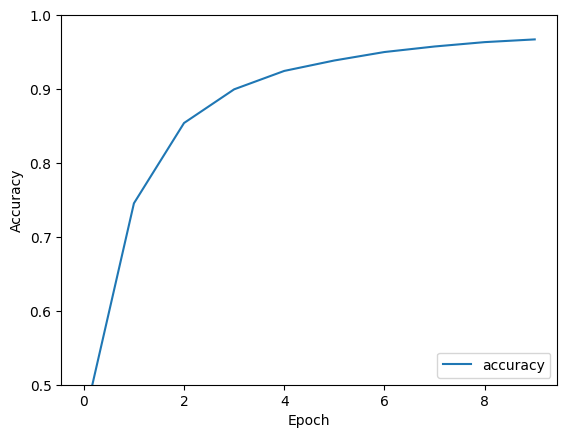

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)